<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

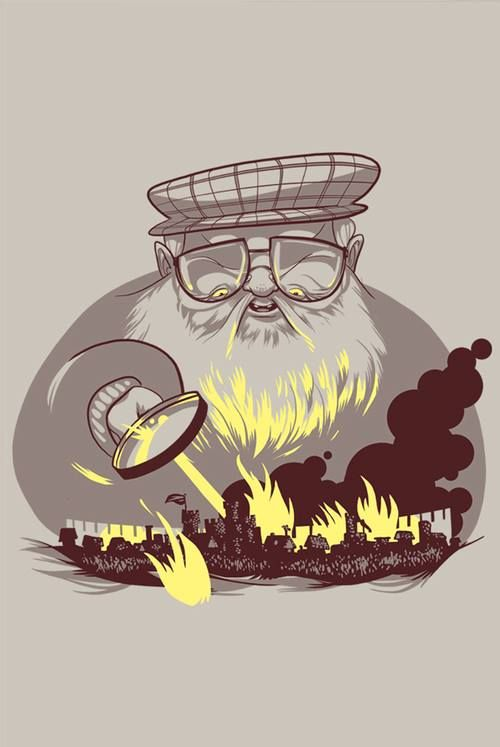

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 64.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 67.9MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data_nan = data.isna().sum(axis=0).to_frame(name='Количество NaN')
data_nan

,Количество NaN
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [5]:
percentage_nan = []
for ind, _ in enumerate(list(data.columns)):
  percentage_nan.append(round(data[data.columns[ind]].isna().sum(axis=0)/len(data[data.columns[ind]]) * 100, 3))

data_nan['Процент NaN'] = percentage_nan
data_nan

,Количество NaN,Процент NaN
name,0,0.000
title,840,53.950
male,0,0.000
culture,1069,68.658
dateOfBirth,1278,82.081
mother,1539,98.844
father,1535,98.587
heir,1536,98.651
house,381,24.470
spouse,1357,87.155


Text(0.5, 1.0, 'Процент пропущенных значений в каждом столбце')

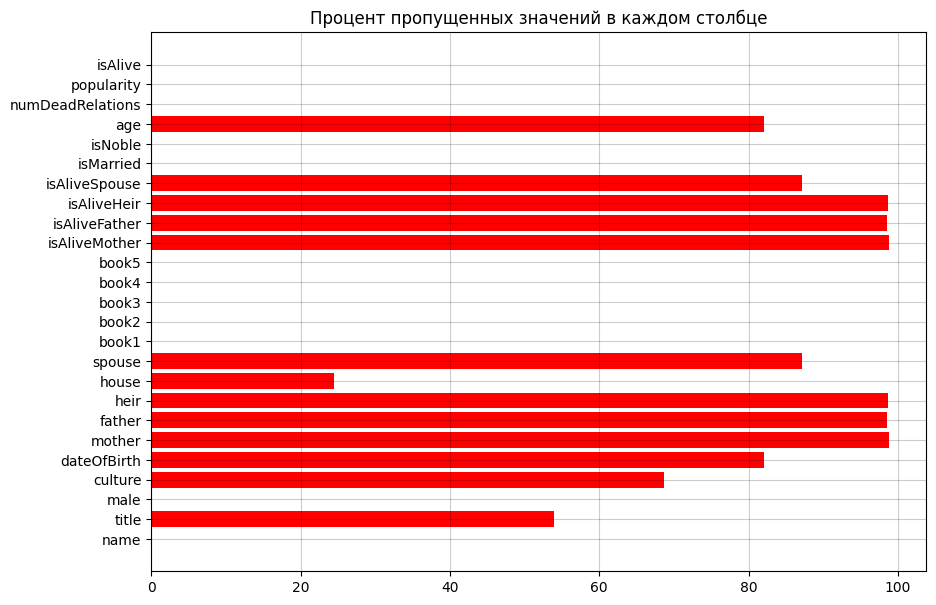

In [6]:
plt.figure(figsize=(10, 7))
plt.grid(color='black', alpha=0.2)
plt.barh(data_nan.index, data_nan['Процент NaN'], color='red')
plt.title('Процент пропущенных значений в каждом столбце')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [8]:
#для того, чтобы принимать решение по поводу значений NaN, посмотрим корреляцию количественных признаков по отношению к целевой переменной
#для этого нужно удалить качественные признаки. очевидно, что имя персонажа, его родителей, наследника и супруги(а) не влияют на целевую переменную.
#поэтому их можно удалить. остальные целевые признаки пока поместим в отдельный датасет

data.drop(['name', 'spouse', 'heir', 'father', 'mother'], axis=1, inplace=True)

qual_features = pd.DataFrame()
for col in list(data.columns):
  if col in ['title', 'house', 'culture']:
    qual_features[col] = data[col]
    data.drop(col, axis=1, inplace=True)

qual_features

,title,culture,house
S.No,,,
1,NaN,NaN,NaN
2,Lord of the Crossing,Rivermen,House Frey
3,Ser,NaN,House Swyft
4,Queen,NaN,House Arryn
5,Greenstone,Dornish,House Santagar
...,...,...,...
1553,Archmaester,NaN,NaN
1554,NaN,NaN,NaN
1555,NaN,NaN,House Seaworth


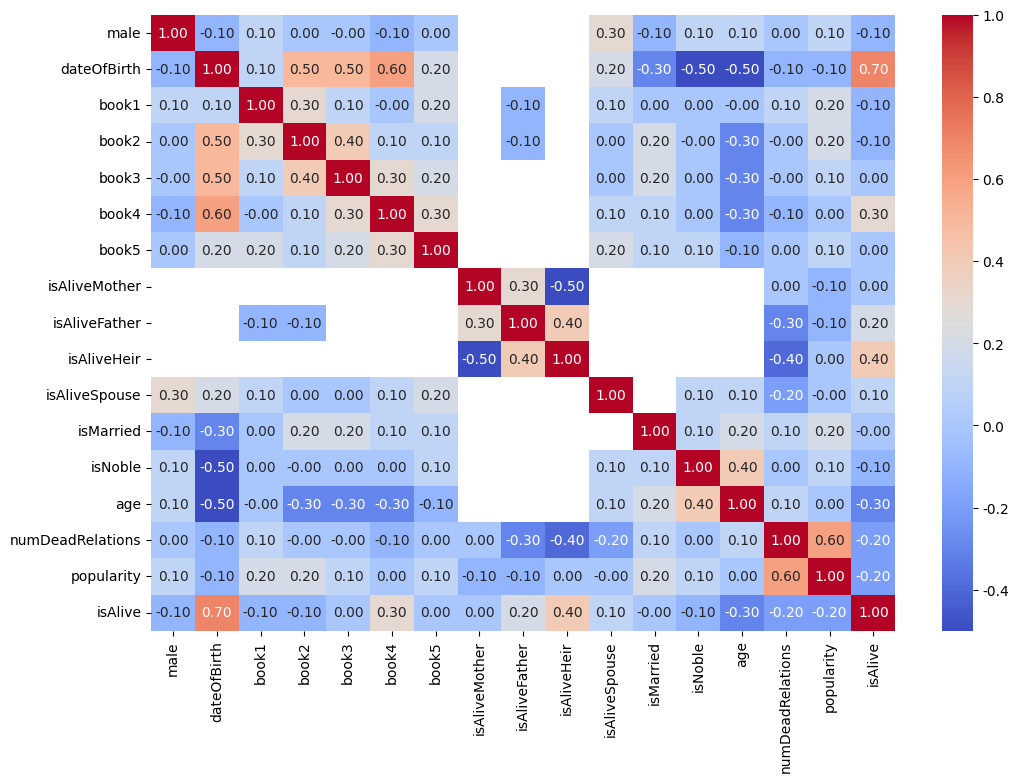

In [9]:
#посмотрим корреляцию количественных признаков
data_corr = data.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'format': '%.1f'})
plt.show()

In [10]:
#объединим обратно датасет с качественными признаками
data = pd.concat([data, qual_features], axis = 1)

In [11]:
data.dropna(subset=['dateOfBirth', 'book4'], inplace=True)

In [12]:
'''
удалим колонки, где количество NaN больше 80 процентов за исключением колонок age и date_or_birth, так как
они имеют неплохую корреляцию с целевой переменной
'''
for col in list(data.columns):
  if data[col].isna().sum(axis=0)/len(data[col]) > 80 and col not in ['age', 'dateOfBirth']:
    data.drop(col, axis=1, inplace=True)

data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,title,culture,house
S.No,,,,,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Lord of the Crossing,Rivermen,House Frey
4,0,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Queen,NaN,House Arryn
5,0,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Greenstone,Dornish,House Santagar
7,1,183.0,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0,Hand of the King,Valyrian,House Targaryen
23,0,289.0,0,0,0,1,0,NaN,NaN,NaN,NaN,0,0,16.0,0,0.033445,1,NaN,NaN,Brotherhood Without Banners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1,266.0,1,1,1,0,1,NaN,NaN,NaN,NaN,0,0,17.0,5,0.354515,0,NaN,Northmen,House Stark
1546,1,256.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,49.0,1,0.856187,1,Highgarden,NaN,House Tyrell
1551,1,279.0,1,1,1,1,0,NaN,NaN,NaN,NaN,0,0,21.0,0,0.143813,0,NaN,NaN,NaN


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [13]:
isPopular = isPopular = list(map(lambda x: 0.5 if x == 0.5 else (0 if x < 0.5 else 1), data['popularity']))
data['isPopular'] = isPopular

boolDeadRelations = [1 if x > 0 else 0 for x in data['numDeadRelations']]
data['boolDeadRelations'] = boolDeadRelations

data.drop(['numDeadRelations', 'popularity'], axis=1, inplace=True)
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,title,culture,house,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,Lord of the Crossing,Rivermen,House Frey,1,1
4,0,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,Queen,NaN,House Arryn,0,0
5,0,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,1,Greenstone,Dornish,House Santagar,0,0
7,1,183.0,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,Hand of the King,Valyrian,House Targaryen,0,0
23,0,289.0,0,0,0,1,0,NaN,NaN,NaN,NaN,0,0,16.0,1,NaN,NaN,Brotherhood Without Banners,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1,266.0,1,1,1,0,1,NaN,NaN,NaN,NaN,0,0,17.0,0,NaN,Northmen,House Stark,0,1
1546,1,256.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,49.0,1,Highgarden,NaN,House Tyrell,1,1
1551,1,279.0,1,1,1,1,0,NaN,NaN,NaN,NaN,0,0,21.0,0,NaN,NaN,NaN,0,0


In [14]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

reverse_cult = {value: key for key, values in cult.items() for value in values}

def simplify_culture(culture):

  if pd.isna(culture):
        return culture

  culture_lower = culture.lower()
  return reverse_cult.get(culture_lower, culture)

data['culture'] = data['culture'].apply(simplify_culture)
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,title,culture,house,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,Lord of the Crossing,Rivermen,House Frey,1,1
4,0,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,Queen,NaN,House Arryn,0,0
5,0,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,1,Greenstone,Dornish,House Santagar,0,0
7,1,183.0,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,Hand of the King,Valyrian,House Targaryen,0,0
23,0,289.0,0,0,0,1,0,NaN,NaN,NaN,NaN,0,0,16.0,1,NaN,NaN,Brotherhood Without Banners,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1,266.0,1,1,1,0,1,NaN,NaN,NaN,NaN,0,0,17.0,0,NaN,Northmen,House Stark,0,1
1546,1,256.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,49.0,1,Highgarden,NaN,House Tyrell,1,1
1551,1,279.0,1,1,1,1,0,NaN,NaN,NaN,NaN,0,0,21.0,0,NaN,NaN,NaN,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 2 to 1557
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               279 non-null    int64  
 1   dateOfBirth        279 non-null    float64
 2   book1              279 non-null    int64  
 3   book2              279 non-null    int64  
 4   book3              279 non-null    int64  
 5   book4              279 non-null    int64  
 6   book5              279 non-null    int64  
 7   isAliveMother      0 non-null      float64
 8   isAliveFather      0 non-null      float64
 9   isAliveHeir        0 non-null      float64
 10  isAliveSpouse      76 non-null     float64
 11  isMarried          279 non-null    int64  
 12  isNoble            279 non-null    int64  
 13  age                279 non-null    float64
 14  isAlive            279 non-null    int64  
 15  title              124 non-null    object 
 16  culture            75 non-null

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [16]:
#удалим колонки с количественными признаками, которые имеют слишком большое количество NaN
#и имеющие при этом слабую корреляцию (за исключением isAliveHeir, но количество NaN слишком большое)
#плюс некоторые столбцы уже удалили выше
data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1, inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [17]:
#целевая переменная количественная
balance_data = data['isAlive'].value_counts(normalize=True) * 100
balance_data

,proportion
isAlive,
1,67.741935
0,32.258065


In [18]:
#виден очевидный дисбаланс

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [19]:
#переводим качественные признаки title, house, culture в количественные
culture = len(data['culture'].unique())
title = len(data['title'].unique())
house = len(data['house'].unique())
print(culture)
print(title)
print(house)

for col in ['culture', 'title', 'house']:
  freq = data[col].value_counts(normalize=True)
  data[f'{col}_encoded'] = data[col].map(freq)

data.drop(['culture', 'title', 'house'], axis=1, inplace=True)
data.head(10)

17
57
89


,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,culture_encoded,title_encoded,house_encoded
S.No,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,1,1,97.0,1,1,1,0.040000,0.008065,0.297619
4,0,82.0,0,0,0,0,0,1,1,23.0,0,0,0,NaN,0.024194,0.003968
5,0,276.0,0,0,0,1,0,1,1,29.0,1,0,0,0.066667,0.008065,0.003968
7,1,183.0,0,0,0,0,0,1,1,26.0,0,0,0,0.280000,0.008065,0.119048
23,0,289.0,0,0,0,1,0,0,0,16.0,1,0,0,NaN,NaN,0.007937
34,0,280.0,0,0,0,1,1,0,0,25.0,1,0,0,NaN,NaN,0.007937
42,1,240.0,0,0,1,0,0,0,0,59.0,0,0,0,NaN,NaN,0.031746
49,1,286.0,0,1,1,1,1,0,0,19.0,1,0,0,0.053333,NaN,0.003968
50,1,278.0,1,1,1,0,1,0,1,27.0,1,0,0,0.013333,0.008065,0.003968


In [20]:
data['culture_encoded'] = data['culture_encoded'].fillna(data['culture_encoded'].mean())
data['title_encoded'] = data['title_encoded'].fillna(data['title_encoded'].mean())
data['house_encoded'] = data['house_encoded'].fillna(data['house_encoded'].mean())
data

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,culture_encoded,title_encoded,house_encoded
S.No,,,,,,,,,,,,,,,,
2,1,208.0,1,1,1,1,1,1,1,97.0,1,1,1,0.040000,0.008065,0.297619
4,0,82.0,0,0,0,0,0,1,1,23.0,0,0,0,0.181511,0.024194,0.003968
5,0,276.0,0,0,0,1,0,1,1,29.0,1,0,0,0.066667,0.008065,0.003968
7,1,183.0,0,0,0,0,0,1,1,26.0,0,0,0,0.280000,0.008065,0.119048
23,0,289.0,0,0,0,1,0,0,0,16.0,1,0,0,0.181511,0.139048,0.007937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1,266.0,1,1,1,0,1,0,0,17.0,0,0,1,0.293333,0.139048,0.019841
1546,1,256.0,1,1,1,1,1,1,1,49.0,1,1,1,0.181511,0.008065,0.019841
1551,1,279.0,1,1,1,1,0,0,0,21.0,0,0,0,0.181511,0.139048,0.109631


In [21]:
#возраст и дата рождения заполним средним и медианой соответственно
data['age'] = data['age'].fillna(data['age'].mean())
data['dateOfBirth'] = data['dateOfBirth'].fillna(data['dateOfBirth'].median())

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 2 to 1557
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               279 non-null    int64  
 1   dateOfBirth        279 non-null    float64
 2   book1              279 non-null    int64  
 3   book2              279 non-null    int64  
 4   book3              279 non-null    int64  
 5   book4              279 non-null    int64  
 6   book5              279 non-null    int64  
 7   isMarried          279 non-null    int64  
 8   isNoble            279 non-null    int64  
 9   age                279 non-null    float64
 10  isAlive            279 non-null    int64  
 11  isPopular          279 non-null    int64  
 12  boolDeadRelations  279 non-null    int64  
 13  culture_encoded    279 non-null    float64
 14  title_encoded      279 non-null    float64
 15  house_encoded      279 non-null    float64
dtypes: float64(5), int64(11)
memor

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

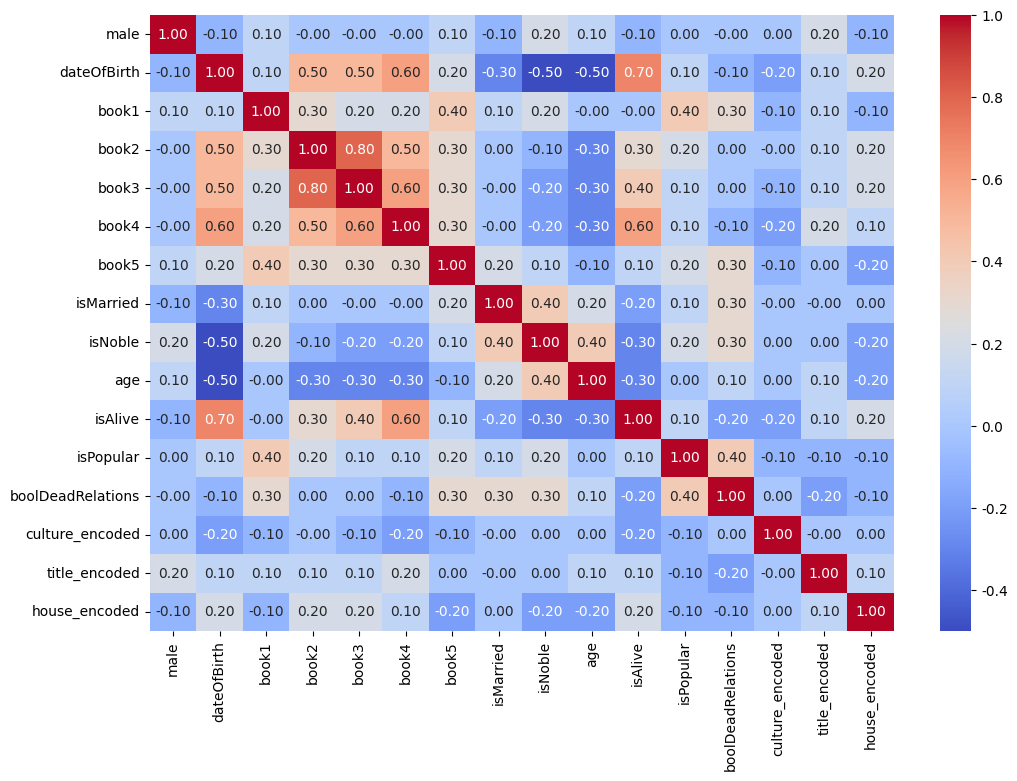

In [23]:
#посмотрим еще раз на корреляцию
data_corr = data.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'format': '%.1f'})
plt.show()

In [24]:
for col in list(data.columns):
  if col not in ['dateOfBirth', 'book4', 'isAlive']:
    data.drop(col, axis=1, inplace=True)
data.head(10)

,dateOfBirth,book4,isAlive
S.No,,,
2,208.0,1,1
4,82.0,0,0
5,276.0,1,1
7,183.0,0,0
23,289.0,1,1
34,280.0,1,1
42,240.0,0,0
49,286.0,1,1
50,278.0,0,1


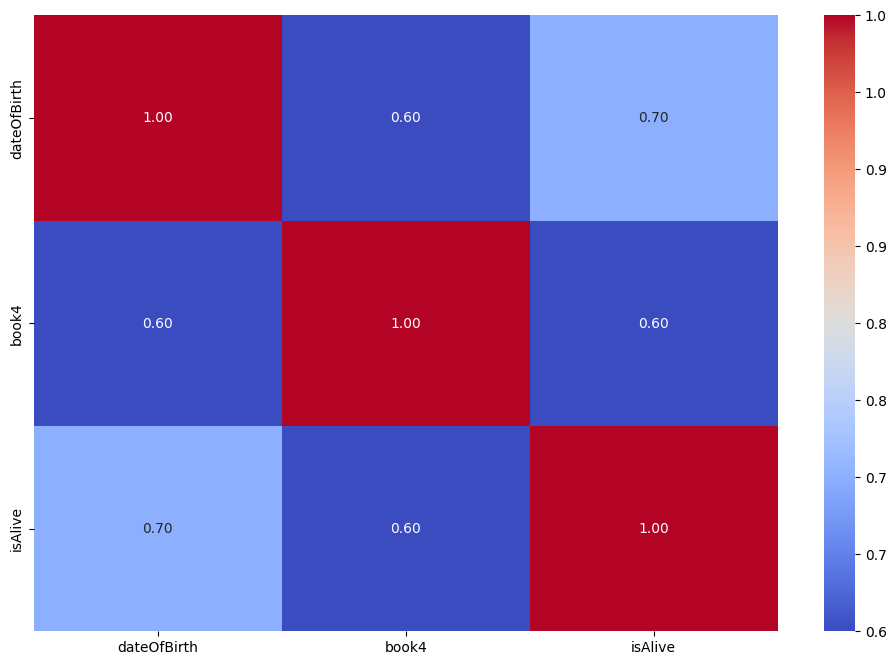

In [144]:
data_corr = data.corr().round(1)
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'format': '%.1f'})
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [129]:
X = data.drop('isAlive', axis=1).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [130]:
from sklearn.model_selection import train_test_split

In [114]:
'''
# Масштабирование данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
'''

In [131]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [133]:
# Шаг 1. создание модели
model = LogisticRegression(max_iter=5000, random_state=42)

# Шаг 2. обучение модели
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
# Выполняем кросс-валидацию на тренировочных данных
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Выводим среднюю точность и стандартное отклонение
print(f"Cross-Validation Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

Cross-Validation Accuracy: 0.8522 (±0.0293)


In [135]:
# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8571


In [145]:
test_data = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
test_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [146]:
#проделаем все те же манипуляции с тестовым датасетом, что и с трейновым
test_data.drop(['name', 'spouse', 'heir', 'father', 'mother'], axis=1, inplace=True)

for col in list(test_data.columns):
  if test_data[col].isna().sum(axis=0)/len(test_data[col]) > 80 and col not in ['age', 'dateOfBirth']:
    test_data.drop(col, axis=1, inplace=True)

isPopular = isPopular = list(map(lambda x: 0.5 if x == 0.5 else (0 if x < 0.5 else 1), test_data['popularity']))
test_data['isPopular'] = isPopular

boolDeadRelations = [1 if x > 0 else 0 for x in test_data['numDeadRelations']]
test_data['boolDeadRelations'] = boolDeadRelations

test_data.drop(['numDeadRelations', 'popularity'], axis=1, inplace=True)

cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

reverse_cult = {value: key for key, values in cult.items() for value in values}

def simplify_culture(culture):

  if pd.isna(culture):
        return culture

  culture_lower = culture.lower()
  return reverse_cult.get(culture_lower, culture)

test_data['culture'] = test_data['culture'].apply(simplify_culture)

test_data.drop(columns=['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], axis=1, inplace = True)

culture = len(test_data['culture'].unique())
title = len(test_data['title'].unique())
house = len(test_data['house'].unique())
for col in ['culture', 'title', 'house']:
  freq = test_data[col].value_counts(normalize=True)
  test_data[f'{col}_encoded'] = test_data[col].map(freq)

test_data.drop(['culture', 'title', 'house'], axis=1, inplace=True)

test_data['culture_encoded'] = test_data['culture_encoded'].fillna(test_data['culture_encoded'].mean())
test_data['title_encoded'] = test_data['title_encoded'].fillna(test_data['title_encoded'].mean())
test_data['house_encoded'] = test_data['house_encoded'].fillna(test_data['house_encoded'].mean())

test_data['age'] = test_data['age'].fillna(test_data['age'].mean())
test_data['dateOfBirth'] = test_data['dateOfBirth'].fillna(test_data['dateOfBirth'].median())

for col in list(test_data.columns):
  if col not in ['dateOfBirth', 'book4', 'isAlive']:
    test_data.drop(col, axis=1, inplace=True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dateOfBirth  389 non-null    float64
 1   book4        389 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 9.1 KB


In [122]:
#test_data = scaler.transform(test_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [138]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных
pred = model.predict(test_data)
pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [100]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [101]:
# Шаг 3. Предсказание на тестовых данных
#СДЕЛАЛ ВЫШЕ

# Шаг 4. Оценка предсказания по метрике accuracy

#СДЕЛАЛ ВЫШЕ

Accuracy : 0.8393


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [139]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.4MB/s]


In [140]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [141]:
submission['isAlive'] = pred

In [142]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [143]:
submission.to_csv("/content/new_submission.csv", index=False)